In [9]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
import scipy.stats as stats

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>

# What is attribute?
An attribute is a data field, representing a characteristic or feature of a data object. The
nouns **attribute, dimension, feature, and variable** are often used interchangeably in the
literature.

## Nominal Attribute 类别属性
Nominal Attribute can be referred to Categorical Feature. 

For example: *hair_color, matrital_status*. *hair_color*: black, brown, yellow, red....

* It makes no sense that Mean or Median value from a Nominal Attribute, But Mode Value

## Binary Attribute 二元属性
* A binary attribute is symmetric if both of its states are equally valuable and carry the same weight

e.g: the attribute gender haves the states male and female.

* A binary attribute is asymmetric if the outcomes of the states are not equally important

e.g: such as the positve and negative outcomes of a medical test for HIV

## Ordinal Attribute，顺序属性
* Values with meaningful order or ranking. The central tendency can be repersented by its Mode, Median, but not Mean

e.g: grade: A+,A-,B+,B-; satisfied rank: 0,1,2,3,4

注意：类别，二元，序列属性都是定性的，而不是定量，数字只是代表这个定性的数值表现。

## 数值属性
* 区间属性, 用来衡量两个数值的差值，不具有绝对的零点。

e.g：10摄氏度跟5摄氏度之间差了5度，但是不能说10度是5度的两倍。因为0度并不代表没有温度，温度就没有一个绝对的零点。日历不存在绝对的零点。

* 比率标度属性

e.g: 具有绝对的零点。比如：美元，100美元是1美元的100倍

## 中心趋势度量：均值，中位数和众数
均值: $$ \bar{x} = \frac{\sum_{i=1}^{N}X_i}{N} $$ 

加权平均：对面每个具体的值，与一个权重$w_i$相连，权重反应所对应的意义、重要性或出现的频率
$$ \bar{x} = \frac{w_1x_1+w_2x_2+\cdots+w_3x_3}{w_1+w_2+\cdots+w_3} $$

* 均值对极端值（离群点，异常值）很敏感。为了减少异常值的影响，可以使用**截尾均值**，去除高端和低端分别2%的数据，再来计算平均

对于倾斜的数据，数据中心的更好的度量是**中位数**

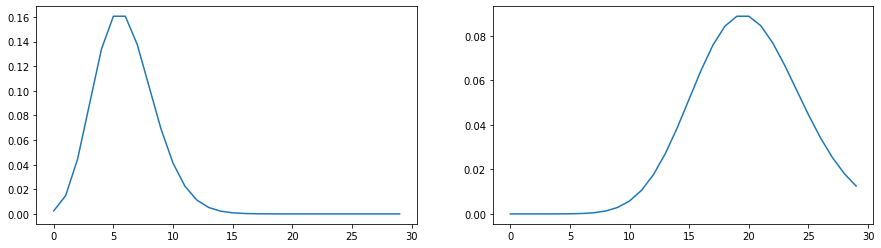

In [38]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(np.arange(30),stats.poisson.pmf(np.arange(30),mu=6))
plt.subplot(1,2,2)
plt.plot(np.arange(30),stats.poisson.pmf(np.arange(30),mu=20))

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
**众数**是集合中出现最频繁的值。对于定性和定量属性确定众数，可能最高频率对应多个不同值，导致有多个众数。具有一个、两个、三个的数据集合分别称为**单峰，双峰，三峰**，**（注意：此处不是说数据的分布，而是说最高频率可能有多个值）**

**众数** 的经验公式
$$ mean - mode = 3 \times (mean - median) $$

**中列数**，用来评估数值数据的中信趋势。中列数是最大最小值的平均值。

在大部分实际运用中，数据都是不对称的，可能是**正倾斜的**，其众数出现在小于中位数的值上，或者**负倾斜的**，其众数出现在大于中位数的值上。
![](images/分布图.png)

## 度量数据分布：极差、四分位数、方差、标准差和四分位数极差

**极差**：是特征的最大值减去最小值
**分位数**：是取自数据分布的每个一定间隔上的点。
e.g：比如2-分位数，就是把数据分成两半，2-分位点就是中位数。4-分位数就是把数字分成三份，分割点的数据数值情况就是分位数的数字

* **四分位极差(IQR)**：第一个四分位数记为$Q_1$，第三个四分位数记为$Q_3$，极差定义为$IQR=Q_3 - Q_1$

In [66]:
#a=np.random.randn(100)
a = np.arange(11)
print(np.median(a))#中位数
print(np.percentile(a,50))
print(np.percentile(a,75))  # np中使用percentile，表示45%的分位点。pandas中结合groupby一起使用，groupby.quantile(0.4) 

5.0
5.0
7.5


**盒图**：分别按照**五数概况**，按次序分别为$Min,Q_1,Median,Q_3,Max$写出
* 盒的端点一般在四分位数上，使得盒的长度是四分位数的极差IQR
* 中位数用盒内的线标记
* 盒外的两条线（称作胡须）延伸到最小（Min）和最大（Max）观测值。

### 盒图可以观测异常值
当处理适中的观测值时，图中会个别的绘出可能的离群点，在胡须外的数据。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


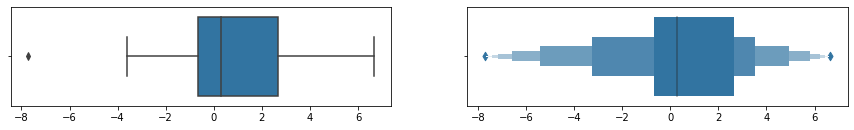

In [121]:
np.random.seed(10)
a = np.random.randn(10) * 5
plt.figure(figsize=(15,4))
plt.subplot(2,2,1);sns.boxplot(a);
plt.subplot(2,2,2);sns.boxenplot(a);

**方差和标准差** 方差和标准差都是数据散步度量，指出数据分布的散布程度。（标准差可以进行特征之间的比较）低标准差意味着数据观测倾向非常靠近均值，高标准差表示分布很散。$$\sigma^2 = \frac{1}{N}\sum_{i=1}^{N}(x_i - \bar(x))^2 = (\frac{1}{N}\sum_{i=1}^{N}x_i^2)^2 - \bar{x}^2$$

方差为：$\sigma^2$，标准差为：$\sigma$

**标准差的性质**
* $\sigma$度量关于均值的发散，仅当选择均值作为中心度量使用。
* 仅当不存在发散时，即当所有的观测值都具有相同值时，$\sigma$ = 0；否则$\sigma$ > 0

**直方图**
**散点图**，a，b表示正相关，负相关。其他表示无关。
![](images/散点图1.png)![](images/散点图2.png)